# Manipulação de dados do Observatório Pierre Auger

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson
path = 'C:/Users/alice/Documents/Unicamp/IC 2018 - 2019/Imagens IC/'
azulQuanta = '#117DF5'
azuldarkQuanta = '#086A99'
laranjaShow = '#FF7F27'

In [2]:
dadosAuger = pd.read_csv('eventos_Auger.csv')
len(dadosAuger)
dadosAuger.head()

,id,theta,E,ra,dec
0,70137858700,14.22,164.926,192.91,-21.15
1,142937927500,6.85,154.648,102.89,-37.83
2,182242127601,47.85,147.480,125.04,-0.61
3,82685012000,49.82,141.030,287.76,1.55
4,140650707000,58.47,132.283,340.57,11.97


In [3]:
dadosAuger_Energy = dadosAuger[dadosAuger.E>=40]
dadosAuger_Energy.describe()

,id,theta,E,ra,dec
count,1.119000e+03,1119.000000,1119.000000,1119.000000,1119.000000
mean,1.228985e+11,42.573404,54.208823,176.756127,-27.482956
std,3.771294e+10,19.504456,15.906922,101.531077,28.398628
min,4.019011e+10,0.860000,40.005500,0.170000,-87.290000
25%,9.243510e+10,26.910000,43.638200,93.105000,-48.665000
50%,1.224006e+11,43.110000,48.548600,180.170000,-28.630000
75%,1.535363e+11,58.420000,59.568800,257.445000,-6.270000
max,1.824050e+11,79.951100,164.926000,359.950000,42.792500


In [4]:
Energia = dadosAuger_Energy['E']
phi = dadosAuger_Energy['ra']
theta = 90 - dadosAuger_Energy['dec']
#print(np.cos(np.radians(theta)))

def is_nan(x):
    return (x is np.nan or x != x)

for value in theta:
    resposta = is_nan(value)
    if resposta == True:
        print (value)

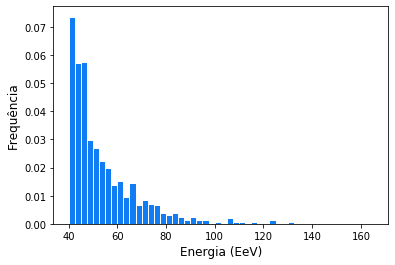

In [5]:
div = 50
plt.hist(Energia, bins = div, density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel('Energia (EeV)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
#plt.xlim(40,100)
plt.savefig(path+'Energia_Auger', ext='png')
plt.show()

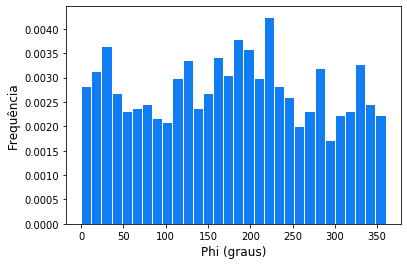

In [6]:
div = 30
plt.hist(phi, bins = div, density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel('Phi (graus)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
#plt.xlim(40,100)
plt.savefig(path+'Phi_Auger', ext='png')
plt.show()

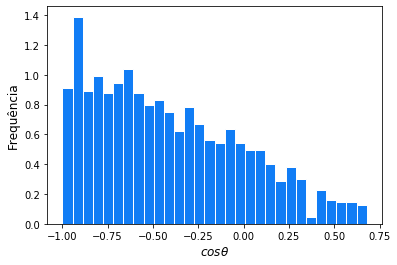

In [7]:
div = 30
plt.hist(np.cos(np.radians(theta)), bins = div, density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel(r'$cos \theta$', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
#plt.xlim(40,100)
plt.savefig(path+'Theta_Auger', ext='png')
plt.show()

In [8]:
def distanciaCosseno(theta, phi):
    distancias = []
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    for i in range(len(theta)):
        j = i+1
        while j<len(theta):
            d = x[i]*x[j]+y[i]*y[j]+z[i]*z[j]
            distancias.append(d)
            j+=1
    return distancias

In [9]:
theta_rad = theta*np.pi/180

phi_rad = phi*np.pi/180

print(min(theta_rad)*180/np.pi)

47.2075


In [10]:
distanciasDirecoes = distanciaCosseno(theta_rad,phi_rad)

In [11]:
angulosDirecoes = np.degrees(np.arccos(distanciasDirecoes))

In [12]:
print(len(distanciasDirecoes))
print(math.factorial(len(theta_rad))/(math.factorial(len(theta_rad)-2)*2))

625521
625521.0


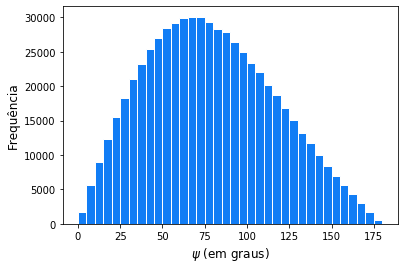

In [13]:
#Fazer histograma dos angulos
div = 50
plt.hist(angulosDirecoes, bins = np.arange(0,185,5), edgecolor='white',facecolor=azulQuanta)
plt.xlabel(r'$\psi$ (em graus)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.savefig(path+'correlacao ângulo Auger', ext='png')
plt.show()

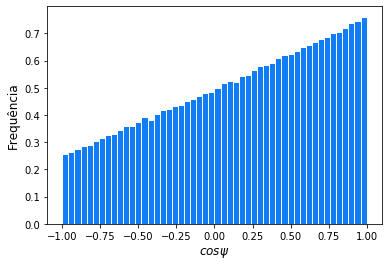

In [14]:
#Fazer histograma dos cossenos dos angulos
div = 50
plt.hist(distanciasDirecoes, bins = div, density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel(r'$cos\psi$', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.savefig(path+'correlacao Auger', ext='png')
plt.show()

## Simulações

In [15]:
def exposicao():
    # Parametros
    a0 = np.radians(-35.2)
    theta_m = np.radians(60)
    x_inicial = np.radians(-90)
    x_final = np.radians(90)
    #Criar vetores uniformemente distribuídos
    N4 = 3700
    #np.random.seed(192)
    u = np.random.random_sample(N4)
    #np.random.seed(96)
    v = np.random.random_sample(N4)
    #np.random.seed(3)
    w = np.random.random_sample(N4)
    np.random.seed()
    #Associar phi e theta a u e v
    phiEx_rad = 2. * np.pi * v 
    thetaEx_rad = np.arccos(((2. * u) - 1.))
    #Relacionar alpha e delta (coordenadas equatoriais) com phi e theta 
    #alpha = phi
    alpha_rad = phiEx_rad
    #delta = theta - pi/2
    delta_rad = thetaEx_rad - (np.pi / 2.)
    #Calcula exposicao
    omega = np.zeros(len(delta_rad))
    for i in range(len(delta_rad)):
        psi = (np.cos(theta_m) - (np.sin(a0) * np.sin(delta_rad[i])))/(np.cos(a0) * np.cos(delta_rad[i]))
        if (psi > 1):
            alfa_m = 0
        elif (psi < (-1)):
            alfa_m = np.pi
        else:
            alfa_m = np.arccos(psi)

        omega[i] = ((np.cos(a0) * np.cos(delta_rad[i]) * np.sin(alfa_m)) + (alfa_m * np.sin(a0) * np.sin(delta_rad[i])))
    # Normaliza o omega
    omega_max = max(omega)
    omega_relativo = omega/omega_max
    # Aplica filtro e seleciona o delta referente
    delta_in = []
    alpha_in = []
    for i in range(len(w)):
        if w[i] < omega_relativo[i]:
            delta_in.append(delta_rad[i])
            alpha_in.append(alpha_rad[i])
    phiEx_in = []
    thetaEx_in = []
    for i in range(len(alpha_in)):
        phiEx_in.append(alpha_in[i])
        #delta = theta - pi/2
        thetaEx_in.append(delta_in[i] + (np.pi / 2.))
    return thetaEx_in, phiEx_in

In [16]:
thetas = []
phis = []
for i in range(100):
    theta, phi = exposicao()
    thetas.append(theta[0:1119])
    phis.append(phi[0:1119])
    #print(len(thetas[i]))

In [17]:
distanciasExposicoes = []
angulosExposicoes = []
for i in range(len(thetas)):
    distanciasExposicoes.append(distanciaCosseno(thetas[i], phis[i]))
    angulosExposicoes.append(np.degrees(np.arccos(distanciasExposicoes[i])))

In [18]:
def histograma_np(angulos):
    y_bruto, x_bruto = np.histogram(angulos, bins=np.arange(0,185,5))
    return y_bruto

In [19]:
y_altura = []
for i in range(len(angulosExposicoes)):
    y_altura.append(histograma_np(angulosExposicoes[i]))
    #print(len(angulosExposicoes[i]))

#(y_altura[0][1])
mediasCalculadas = []

for i in range(len(y_altura[0])):
    media = 0
    for j in range(len(y_altura)):
        media = y_altura[j][i] + media
        #print(media)
    mediasCalculadas.append(media/len(y_altura))

In [20]:
y_dados = histograma_np(angulosDirecoes)
len(angulosDirecoes)

625521

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

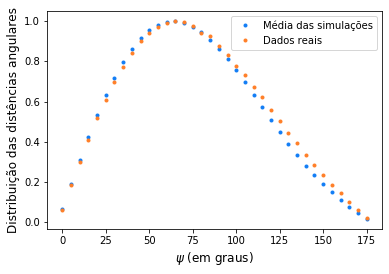

In [35]:
plt.plot(np.arange(0,180,5),mediasCalculadas/max(mediasCalculadas),'.', color=azulQuanta, label = 'Média das simulações')
plt.plot(np.arange(0,180,5),y_dados/max(y_dados),'.', color=laranjaShow, label = 'Dados reais')
#plt.plot(np.arange(0,180,5),y_altura[4],'.', label = 'Dados reais')
plt.xlabel(r'$\psi$ (em graus)', fontsize = 12)
plt.ylabel('Distribuição das distências angulares', fontsize = 12)
plt.legend(loc='best')
#plt.savefig(path+'real e simulados', ext='png')
plt.plot

In [22]:
def poissonVer(dados, medias):
    prob = []
    for i in range(len(medias)):
        p = dados[i]*math.log(medias[i]) - medias[i] - math.log(math.factorial(dados[i]))
        prob.append(p)
    verr = sum(prob)
    return verr

verrReal = poissonVer(y_dados, mediasCalculadas)

In [23]:
verrReal

-1552.8067902805055

In [24]:
verrSimulado = []
for i in range(len(y_altura)):
    verrSimulado.append((poissonVer(y_altura[i], mediasCalculadas)))

poissonVer(y_altura[0], mediasCalculadas)

-1074.3823615310396

In [25]:
print(len(y_altura[0]))
print(mediasCalculadas)
#poisson(y_altura[0], medias[0])

36
[1941.43, 5778.75, 9484.87, 13052.49, 16356.62, 19440.41, 22140.21, 24542.96, 26592.48, 28182.33, 29463.3, 30279.59, 30744.07, 30822.35, 30584.06, 29976.36, 29148.33, 27981.05, 26589.31, 25053.81, 23305.45, 21462.54, 19545.78, 17628.11, 15665.14, 13793.78, 11985.33, 10253.28, 8624.15, 7157.86, 5783.97, 4536.03, 3415.33, 2361.22, 1386.57, 461.68]


In [26]:
print(verrSimulado)

[-1074.3823615310396, -425.44530982703736, -247.33041930452828, -314.20985788679354, -262.41248526228355, -710.0846248160703, -254.61875016131125, -506.1431699201544, -320.18838400423147, -235.82096323266705, -235.461274187232, -224.29480024664463, -297.2260895041645, -320.2840148315004, -246.22468768303997, -502.5394484959438, -289.3135357550823, -223.6376864994836, -326.75407115372445, -241.15976394317613, -463.2621057787078, -356.4456429662823, -856.7708851541186, -520.85747664264, -466.3367914106525, -279.4916355709979, -309.7592103992174, -267.05717162264045, -239.93611317193267, -237.06587279460928, -299.32666245874816, -336.98687702759435, -469.67033549708117, -305.415190728982, -305.6722176390872, -378.2652225286106, -409.6972190291208, -505.2681755473882, -299.8772717804077, -224.71687892187902, -240.25394957188837, -554.7641288984701, -495.2728278779223, -281.75344340980564, -213.47410082724718, -271.2692545603263, -272.1776633697277, -434.62117499689475, -226.14592926106297,

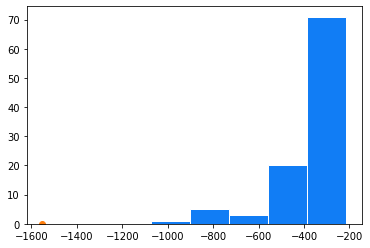

In [27]:
#Fazer histograma dos cossenos dos angulos
div = 5
plt.hist(verrSimulado, bins = div, edgecolor='white',facecolor=azulQuanta)
plt.plot(verrReal,0,'o')
#plt.xlabel(r'$cos\psi$', fontsize = 12)
#plt.ylabel('Frequência', fontsize = 12)
#plt.savefig(path+'correlacao Auger', ext='png')
plt.show()